In [1]:
!pip install opencv-python --upgrade

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
net = cv.dnn.readNetFromTensorflow("C:\\Users\\Gulsu\\Desktop\\graph_opt.pb") ##weights

In [4]:
inWidth = 368
inHeight = 368
thr = 0.2

In [5]:
 BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
                "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 
              }

POSE_PAIRS = [  ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
                ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
                ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
                ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
                ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

In [6]:
img = cv.imread("C:\\Users\\Gulsu\\Desktop\\pose.jpg")

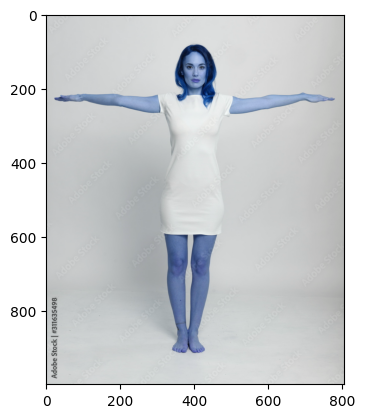

In [7]:
plt.imshow(img)  ##BGR = BLUE,GREEN,RED
plt.show()

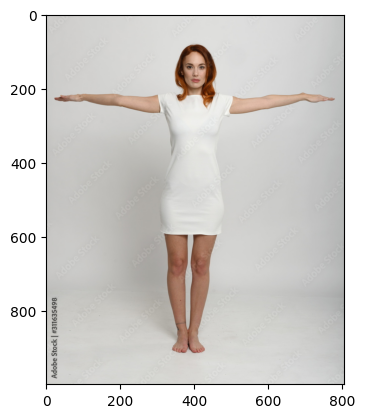

In [8]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [9]:
def pose_estimation(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight) , (127.5, 127.5, 127.5), swapRB = True, crop = False ))
    out = net.forward()
    out = out[:, :19, :, :]

    assert(len(BODY_PARTS) <= out.shape[1])

    points = []  ##list
    
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if it's confidence is higher than threshold.
        #points.append((int(x), int(y)) if conf > args.thr else None)
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    return frame 



In [10]:
estimated_image = pose_estimation(img)

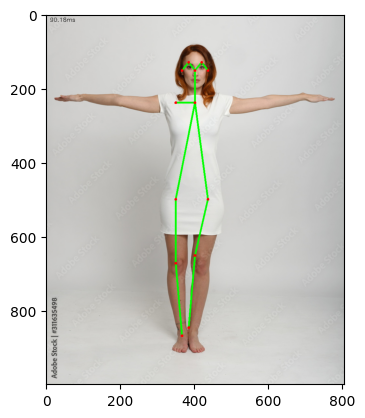

In [11]:
plt.imshow(cv.cvtColor(estimated_image, cv.COLOR_BGR2RGB))

In [12]:
import cv2 as cv
import numpy as np

# Load the pre-trained pose estimation model
net = cv.dnn.readNetFromTensorflow('pose_estimation_models/pose_estimation.pb')

# Define the body parts and pairs for connecting them
BODY_PARTS = {
    "Nose": 0, "Neck": 1, "Right Shoulder": 2, "Right Elbow": 3, "Right Wrist": 4,
    "Left Shoulder": 5, "Left Elbow": 6, "Left Wrist": 7, "Right Hip": 8, "Right Knee": 9,
    "Right Ankle": 10, "Left Hip": 11, "Left Knee": 12, "Left Ankle": 13, "Chest": 14,
    "Background": 15
}

POSE_PAIRS = [
    ["Neck", "Right Shoulder"], ["Neck", "Left Shoulder"], ["Right Shoulder", "Right Elbow"],
    ["Right Elbow", "Right Wrist"], ["Left Shoulder", "Left Elbow"], ["Left Elbow", "Left Wrist"],
    ["Neck", "Right Hip"], ["Right Hip", "Right Knee"], ["Right Knee", "Right Ankle"],
    ["Neck", "Left Hip"], ["Left Hip", "Left Knee"], ["Left Knee", "Left Ankle"]
]

# Set the threshold for confidence in body part detection
thr = 0.2

# Open a video capture object
cap = cv.VideoCapture("C:\\Users\\Gulsu\\Desktop\\Earthquake Classroom Video.mp4")

# Set video capture properties
cap.set(cv.CAP_PROP_FRAME_WIDTH, 800)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 800)

if not cap.isOpened():
    cap = cv.VideoCapture(0)  # Use the webcam if the video file cannot be opened
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while cv.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv.waitKey()
        break

    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    inWidth = 368
    inHeight = 368

    # Prepare the input blob for the neural network
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]

    assert(len(BODY_PARTS) <= out.shape[1])

    points = []

    for i in range(len(BODY_PARTS)):
        heatMap = out[0, i, :, :]
        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv.getTickFrequency() / 1000
    cv.putText(frame, '%.2fms' % (t / freq), (10, 20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))

    cv.imshow('Pose Estimation', frame)


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1138: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "pose_estimation_models/pose_estimation.pb" in function 'cv::dnn::ReadProtoFromBinaryFile'
